In [ ]:
# Titanic: Machine Learning from Disaster

In [2]:
#Import the Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#Load the dataset 

train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# EDA

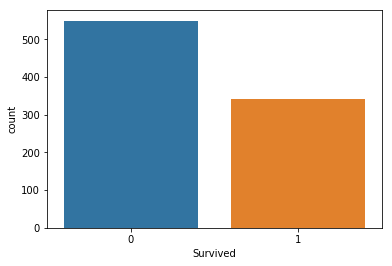

In [9]:
# check the ratio of target variable

sns.countplot(train['Survived'])

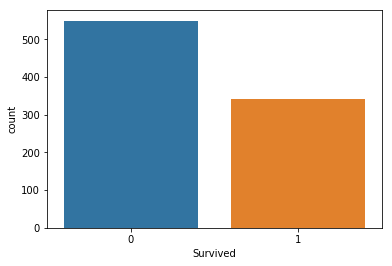

In [10]:
sns.countplot('Survived', data=train)

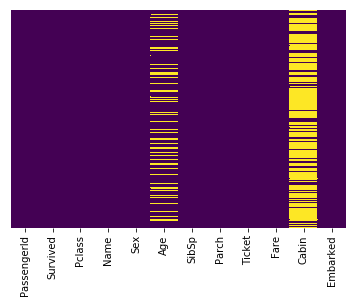

In [12]:
# Check the Missing values of train through heatmap

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

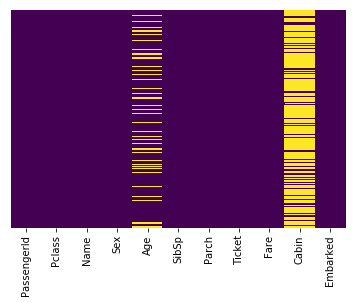

In [13]:
# Check the missing values of test through heatmap

sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

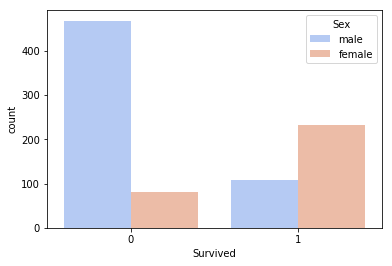

In [19]:
# Check the Survival rate with the hue of sex

sns.countplot('Survived', data=train, hue='Sex', palette='coolwarm')

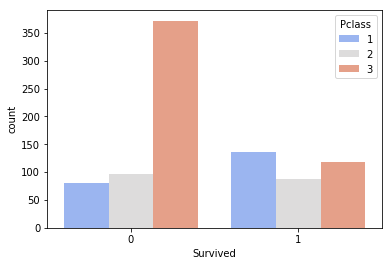

In [20]:
# Survived rate with Pclass

sns.countplot('Survived', data=train, hue='Pclass', palette='coolwarm')

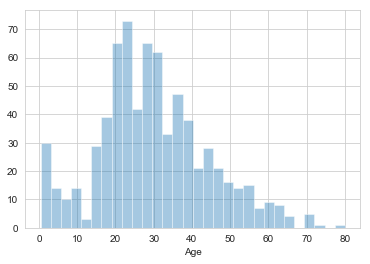

In [26]:
# Age plot for train
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

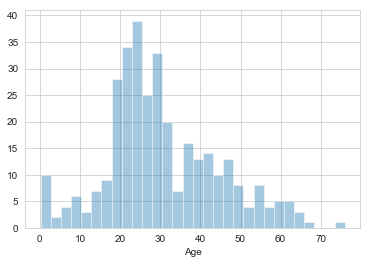

In [28]:
# age plot for test
sns.distplot(test['Age'].dropna(), bins=30, kde=False)

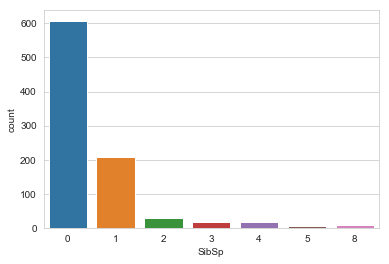

In [30]:
# sibsb

sns.countplot(train['SibSp'])

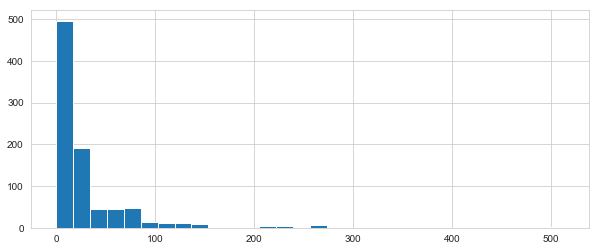

In [34]:
#Fare

train['Fare'].hist(bins=30, figsize=(10,4))

# Data Cleaning

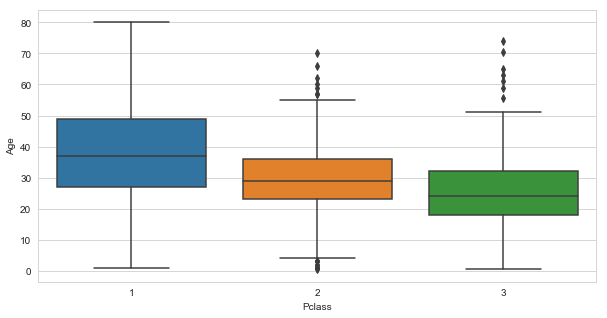

In [40]:
#Age

plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Age', data=train)

In [45]:
# Handling missing values

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    
    if pd.isnull(Age):
        if Pclass==1:
            return  37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [46]:
train['Age']=train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [50]:
test['Age']=test[['Age', 'Pclass']].apply(impute_age, axis=1)

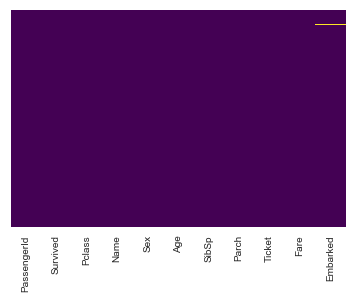

In [56]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

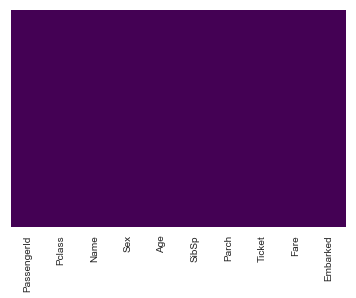

In [57]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [55]:
# drop more than 50% missig data column i.e Cabin

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [58]:
# drop all other null values
train.dropna(inplace=True)
test.dropna(inplace=True)

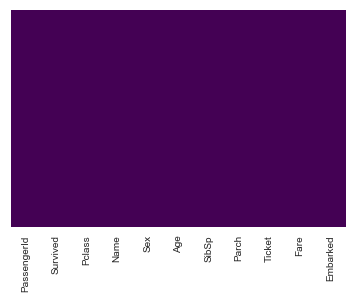

In [59]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

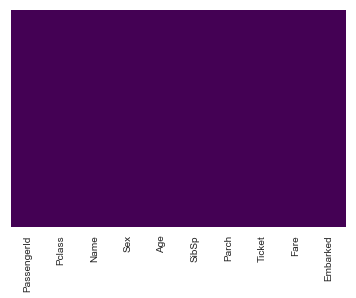

In [60]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Handling Categorical Data

### dummy variables

In [68]:
sex=pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [71]:
embark=pd.get_dummies(train['Embarked'], drop_first=True)

In [72]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [73]:
train=pd.concat([train, sex, embark], axis=1)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [77]:
train.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [78]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [85]:
sex=pd.get_dummies(test['Sex'], drop_first=True)

In [82]:
embark=pd.get_dummies(test['Embarked'], drop_first=True)

In [84]:
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [86]:
test=pd.concat([test, sex, embark], axis=1)

In [87]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [88]:
test.drop(['Sex', 'Embarked', 'PassengerId','Name', 'Ticket'], axis=1, inplace=True)

In [89]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


# Train the Model

In [91]:
X=train.drop('Survived', axis=1)
y=train['Survived']

In [101]:
#split the train test data
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [103]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr_model=LogisticRegression()

lr_model.fit(X_train,y_train)

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [110]:
## Prediction

y_pred=lr_model.predict(X_test)

In [111]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.85      0.81       157\n           1       0.75      0.66      0.71       110\n\n   micro avg       0.77      0.77      0.77       267\n   macro avg       0.77      0.76      0.76       267\nweighted avg       0.77      0.77      0.77       267\n'

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[133,  24],
       [ 37,  73]], dtype=int64)

In [115]:
test_pred=lr_model.predict(test)

In [116]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,